In [ ]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import os.path as path
import time
import glob 
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
sns.set(font_scale=1.5)
import numpy as np
import pandas as pd

In [3]:
import utils
import datatools

In [4]:
DEFAULT_IMAGE_DIR_NAME    = ('/data1/fog-data/fog-maps/')
DEFAULT_TARGET_DIR_NAME   = ('/data1/fog/Dataset/TARGET')
year_information          = {'2009':['20090101', '20091231'],
                            '2010':['20100101', '20101231'],
                            '2011':['20110101', '20111231'],
                            '2012':['20120101', '20121231'],
                            '2013':['20130101', '20131231'],
                            '2014':['20140101', '20141231'],
                            '2015':['20150101', '20151231'],
                            '2016':['20160101', '20161231'],
                            '2017':['20170101', '20171231'],
                            '2018':['20180101', '20181231'],
                            '2019':['20190101', '20191231'],
                            '2020':['20200101', '20201231']}

In [66]:
first_date_string = year_information['2020'][0]
last_date_string  = year_information['2020'][1] 

data_generation_class = datatools.data_generater(img_path = None, 
                                                target_path = None, 
                                                first_date_string = first_date_string, 
                                                last_date_string = last_date_string, 
                                                lead_time_pred = 24)
                                                
dataset = data_generation_class.return_data_dataframe()
dataset.to_csv('./dataset.csv')
dataset

,DateTime,RoundTime,date,date_cycletime,vis,vis_class,year,month,day,timecycle,nam_nc_files_path
0,20200102 05:55:00,20200102 06:00:00,20200102,20200102_0000,10.0,4.0,2020,01,02,0000,/data1/fog-data/fog-maps/2020/2020002/maps_202...
1,20200102 11:55:00,20200102 12:00:00,20200102,20200102_0600,10.0,4.0,2020,01,02,0600,/data1/fog-data/fog-maps/2020/2020002/maps_202...
2,20200102 17:55:00,20200102 18:00:00,20200102,20200102_1200,10.0,4.0,2020,01,02,1200,/data1/fog-data/fog-maps/2020/2020002/maps_202...
3,20200102 23:55:00,20200103 00:00:00,20200102,20200102_1800,10.0,4.0,2020,01,02,1800,/data1/fog-data/fog-maps/2020/2020002/maps_202...
4,20200103 05:55:00,20200103 06:00:00,20200103,20200103_0000,10.0,4.0,2020,01,03,0000,/data1/fog-data/fog-maps/2020/2020003/maps_202...
...,...,...,...,...,...,...,...,...,...,...,...
495,20200527 23:55:00,20200528 00:00:00,20200527,20200527_1800,10.0,4.0,2020,05,27,1800,/data1/fog-data/fog-maps/2020/2020148/maps_202...
496,20200529 05:55:00,20200529 06:00:00,20200529,20200529_0000,10.0,4.0,2020,05,29,0000,/data1/fog-data/fog-maps/2020/2020150/maps_202...
497,20200529 11:55:00,20200529 12:00:00,20200529,20200529_0600,10.0,4.0,2020,05,29,0600,/data1/fog-data/fog-maps/2020/2020150/maps_202...
498,20200529 17:55:00,20200529 18:00:00,20200529,20200529_1200,10.0,4.0,2020,05,29,1200,/data1/fog-data/fog-maps/2020/2020150/maps_202...


In [24]:
map_generater = datatools.fog_map_generator(dataframe_path  = './dataset.csv', 
                                            map_structure = '4D', 
                                            predictor_names = datatools.NETCDF_PREDICTOR_NAMES['All'], 
                                            return_normalize_map = None, 
                                            lead_time_pred = 24)

output_feature_maps = map_generater.return_feature_map_matrix()

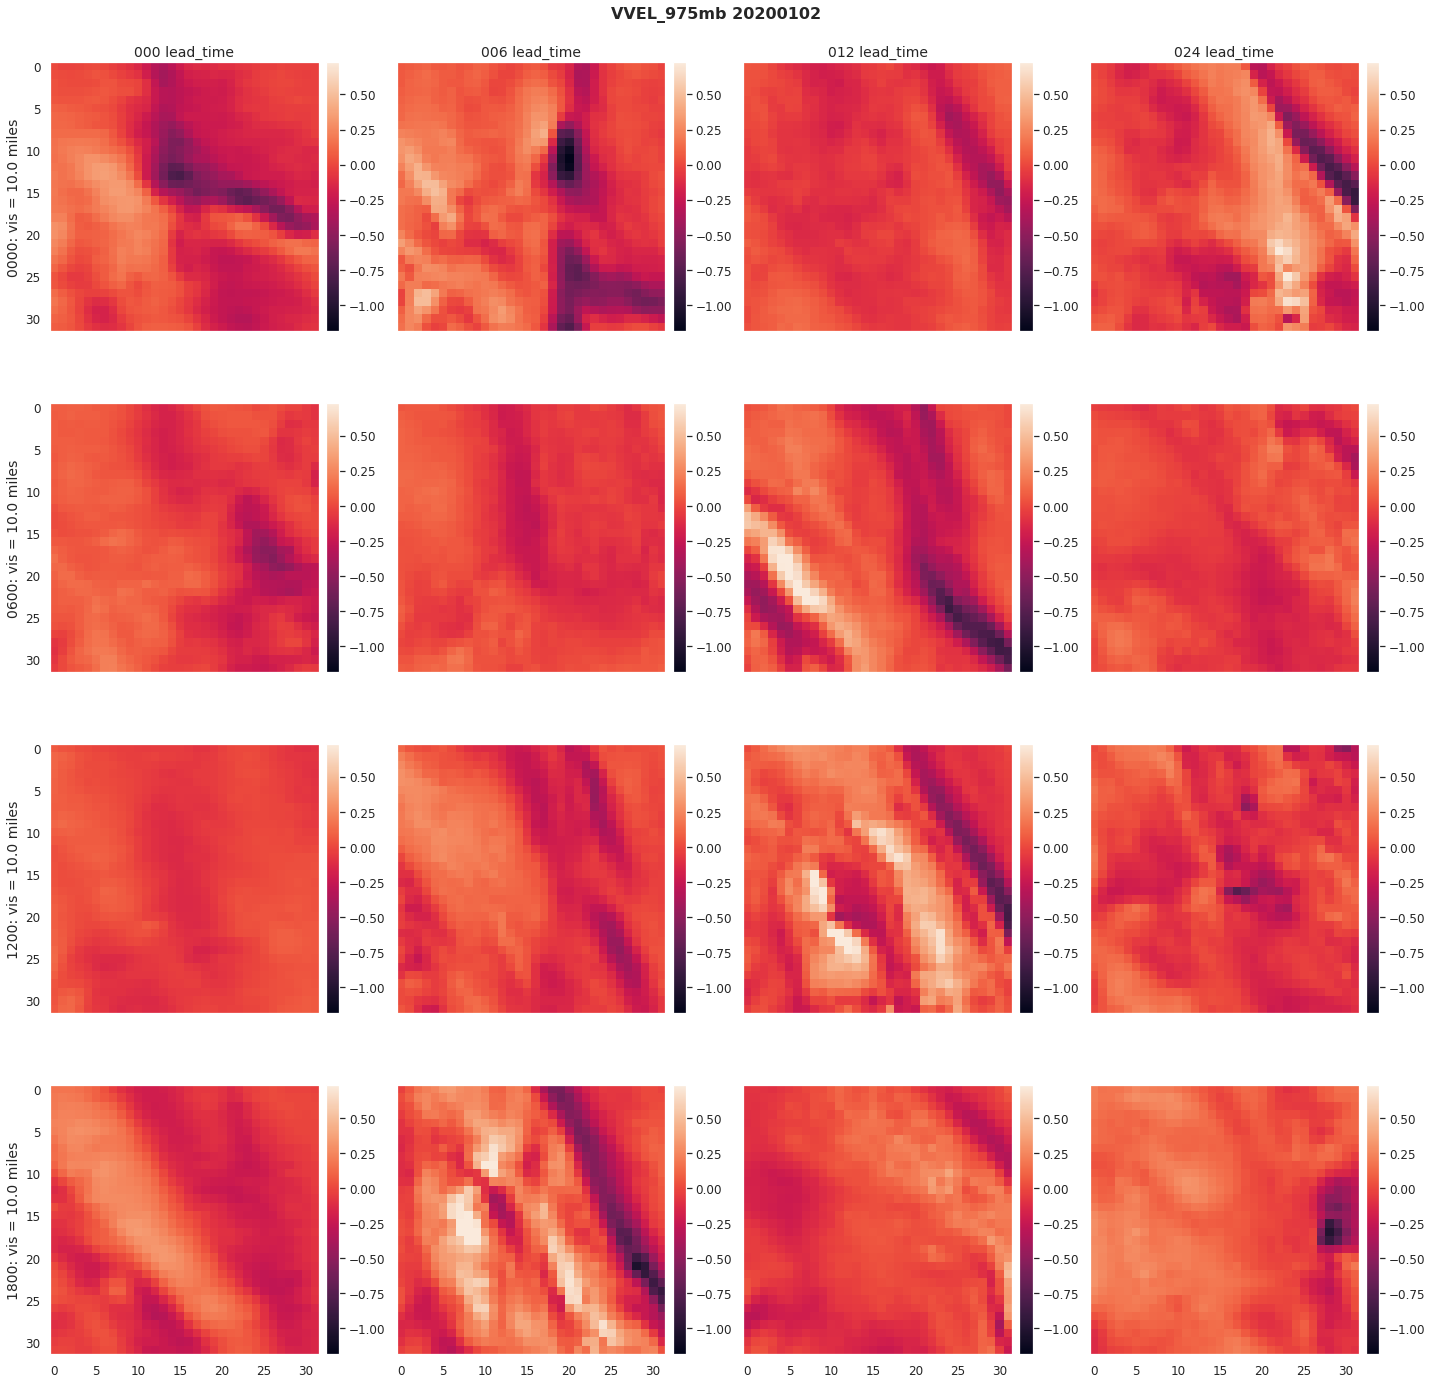

In [89]:
_ = datatools.feature_daily_timeseries_plot(output_feature_maps, dataset, 
                                            date = 20200102, 
                                            feature_name = 'VVEL_975mb')

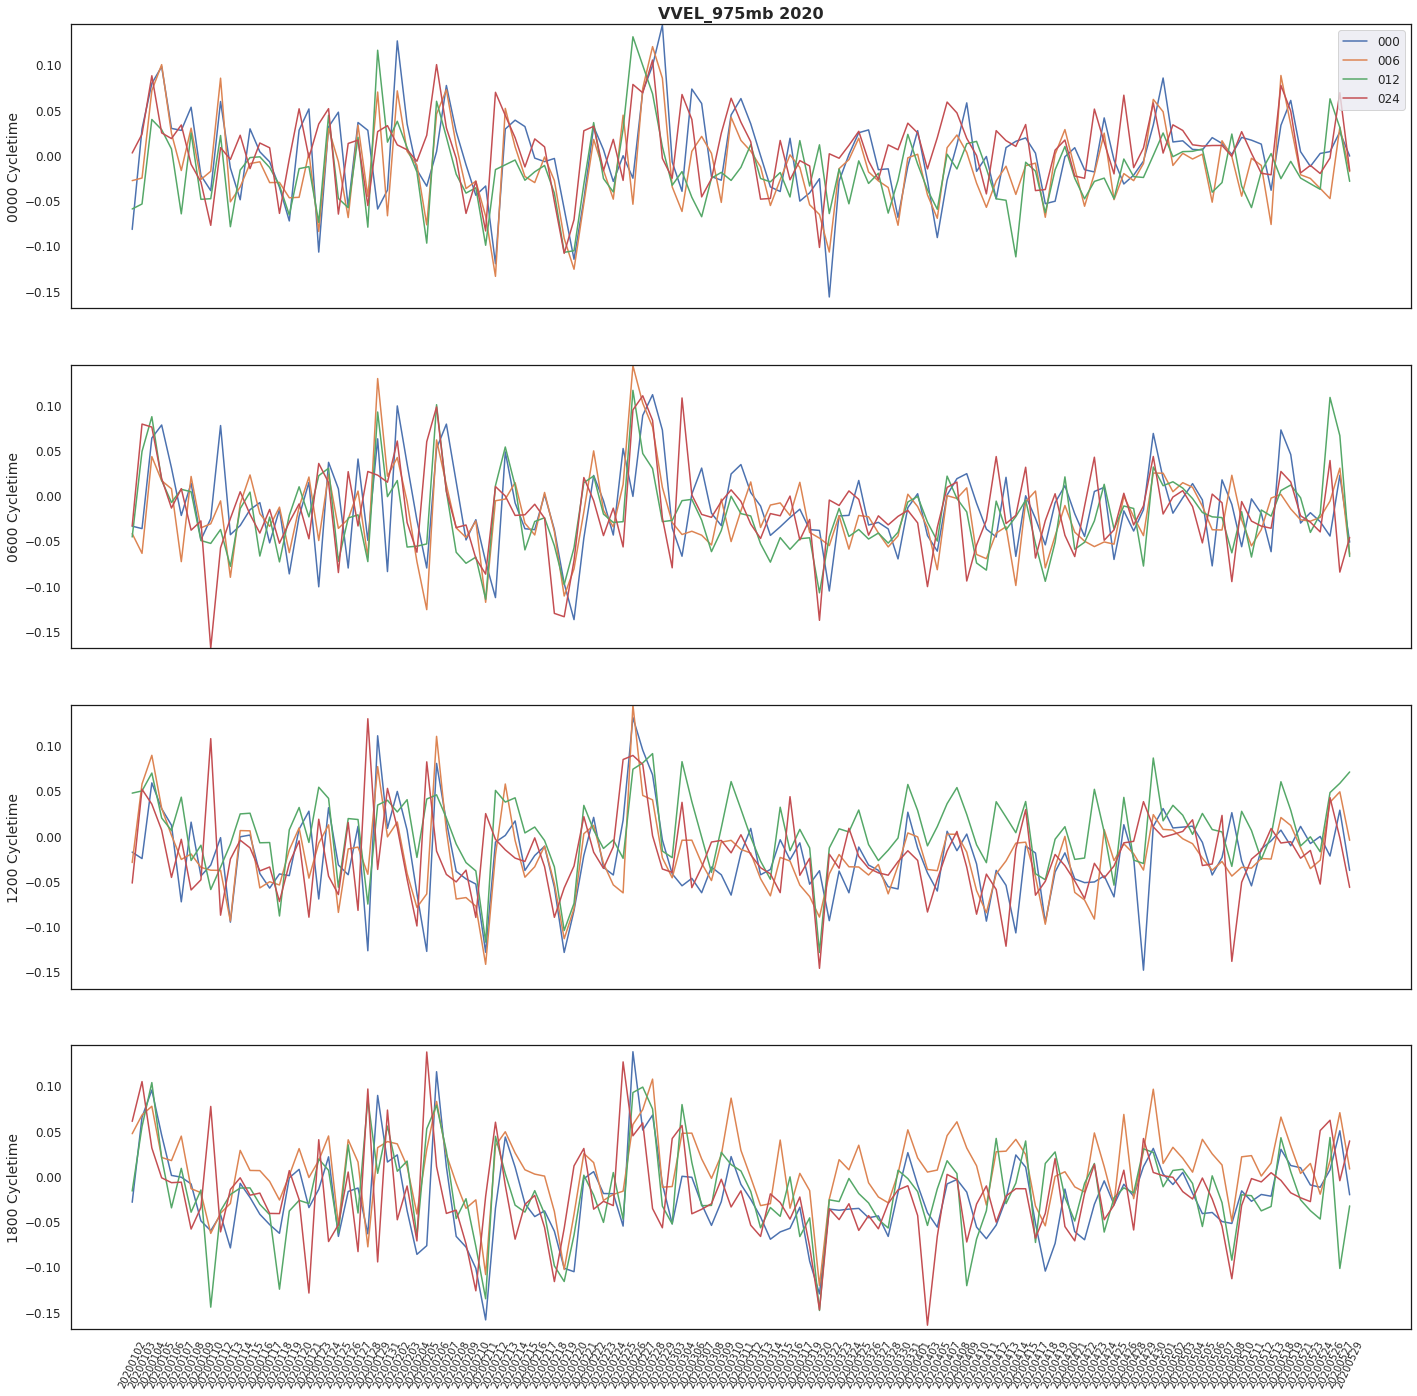

In [88]:
_ = datatools.feature_annual_timeseries_plot(output_feature_maps, dataset, 
                                            year = '2020', 
                                            feature_name = 'VVEL_975mb')